In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

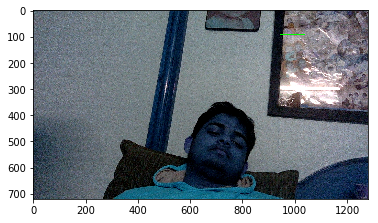

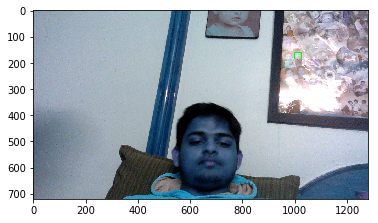

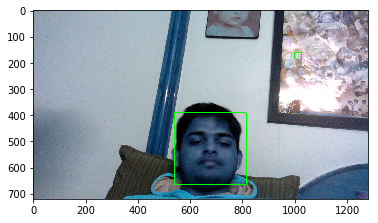

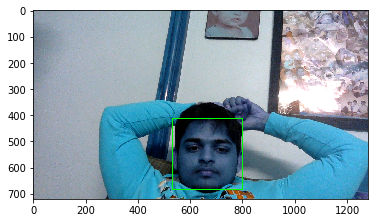

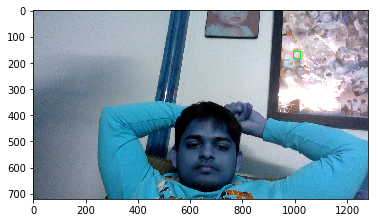

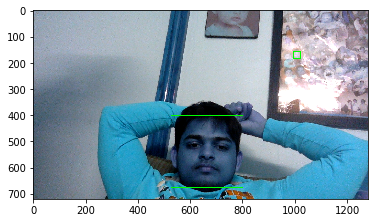

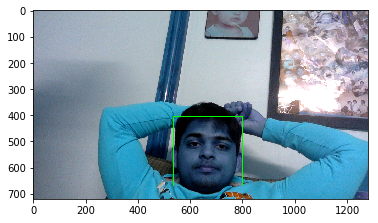

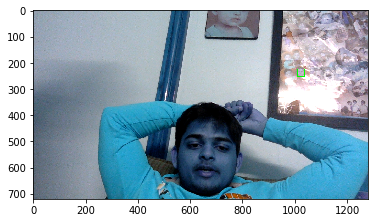

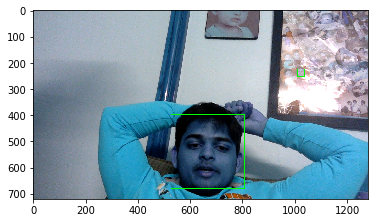

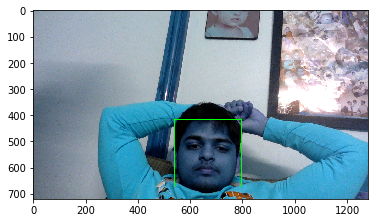

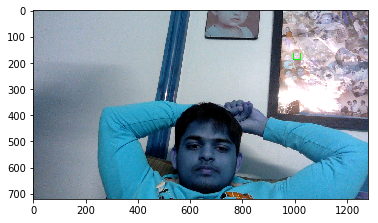

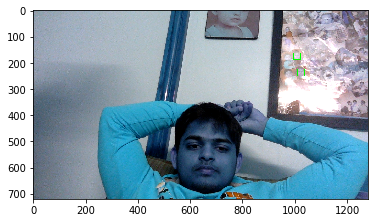

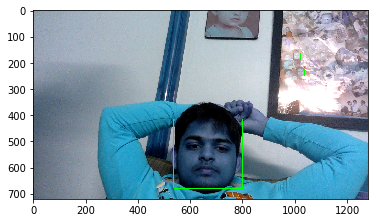

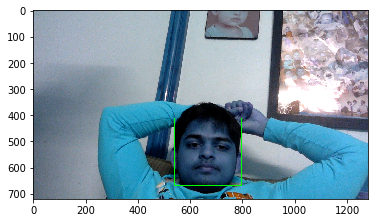

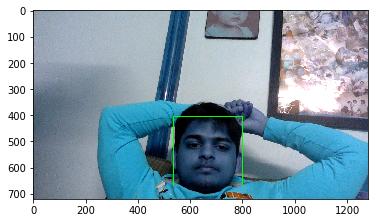

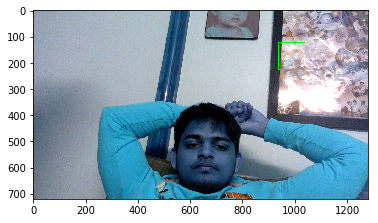

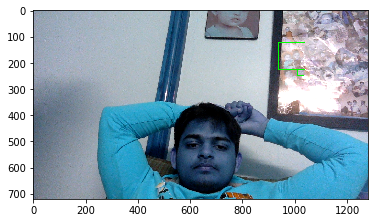

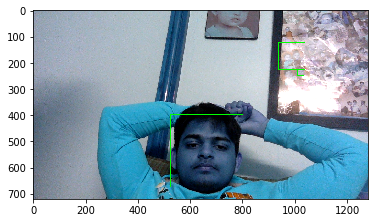

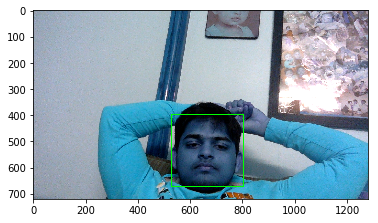

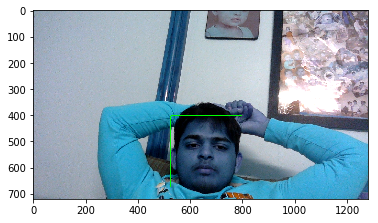

(20, 50, 50, 3)


In [2]:
cam = cv2.VideoCapture(0)
face_cas = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
data = []
ix = 0

while True:
    ret, frame = cam.read()
    
    if ret == True :
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_cas.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces : 
            face_component = frame[y:y+h,x:x+w,:]
            fc = cv2.resize(face_component,(50,50))
            
            if ix%5 == 0 and len(data)<20:
                data.append(fc)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
                plt.figure(0)
                plt.imshow(frame)
                plt.show()
        ix+=1
        
        if cv2.waitKey(1) == 27 or len(data)>=20:
            break
    else:
        print "error"
        break

cv2.destroyAllWindows()
del cam
data = np.asarray(data)
print data.shape
np.save('face_03',data)